# Summer Olympics Data Analysis Assignment

In [1]:
import pandas as pd
import matplotlib

In [2]:
df=pd.read_csv("summer.csv")

In [3]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [4]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

### 1. In how many cities Summer Olympics is held so far?

In [5]:
df["City"].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [6]:
len(df["City"].unique())

22

In [7]:
print("Summer Olympics are held in",len(df["City"].unique()),"cities so far")

Summer Olympics are held in 22 cities so far


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [8]:
most_gold_medals=df.Sport[df.Medal == "Gold"].value_counts()
most_gold_medals

Aquatics             1421
Athletics            1215
Rowing                890
Gymnastics            820
Fencing               552
Football              503
Hockey                486
Sailing               412
Wrestling             391
Shooting              384
Cycling               371
Basketball            342
Canoe / Kayak         334
Volleyball            332
Handball              321
Equestrian            320
Boxing                239
Weightlifting         200
Archery               126
Judo                  123
Baseball              111
Tennis                 92
Rugby                  78
Softball               60
Modern Pentathlon      60
Table Tennis           46
Badminton              46
Tug of War             36
Taekwondo              32
Lacrosse               28
Canoe                  27
Polo                   22
Golf                   13
Cricket                12
Skating                 9
Triathlon               8
Ice Hockey              8
Water Motorsports       5
Croquet     

In [9]:
most_gold_medals.head()

Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Sport, dtype: int64

In [10]:
data=most_gold_medals.head()

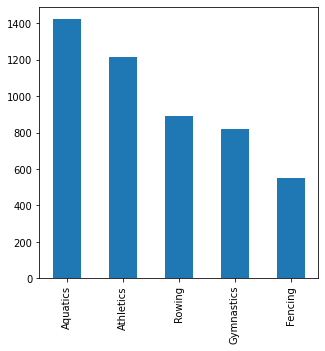

In [11]:
data.plot(x="Sport",y="Medal",kind="bar",figsize=(5,5))

### 3. Which sport is having most number of medals so far? (Top 5)

In [12]:
most_medals=df.groupby("Sport").count()["Medal"].head().sort_values(ascending = False)
most_medals

Sport
Aquatics     4170
Athletics    3638
Baseball      335
Archery       329
Badminton     144
Name: Medal, dtype: int64

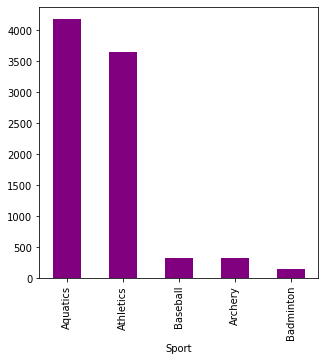

In [13]:
most_medals.plot(x="Sport",y="Medal",kind="bar",color="purple",figsize=(5,5))

### 4. Which player has won most number of medals? (Top 5)

In [14]:
player_most_medals=df.groupby("Athlete").count()["Medal"].sort_values(ascending = False).head()
player_most_medals

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Medal, dtype: int64

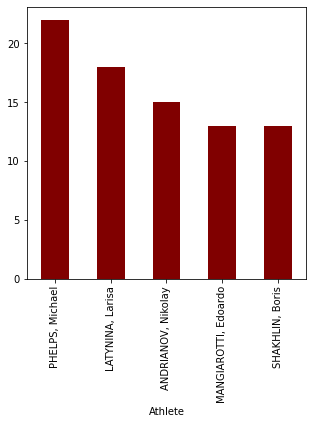

In [15]:
player_most_medals.plot.bar(color="maroon",figsize=(5,5))

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [16]:
Player_most_gold=df.Athlete[df.Medal == "Gold"].value_counts()
Player_most_gold

PHELPS, Michael              18
SPITZ, Mark                   9
LEWIS, Carl                   9
NURMI, Paavo                  9
LATYNINA, Larisa              9
                             ..
BJÖRKMAN, Carl                1
KANGASNIEMI, Kaarlo Olavi     1
JOHANSSON, Sven               1
BERESTOV, Dmitry              1
LINDFORS, Adolf Valentin      1
Name: Athlete, Length: 8287, dtype: int64

In [17]:
data1=Player_most_gold.head()
data1

PHELPS, Michael     18
SPITZ, Mark          9
LEWIS, Carl          9
NURMI, Paavo         9
LATYNINA, Larisa     9
Name: Athlete, dtype: int64

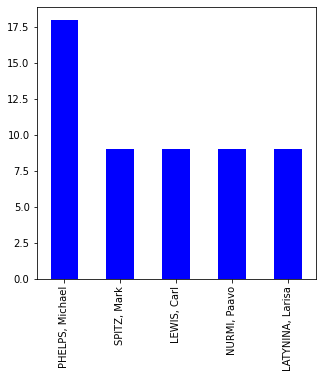

In [18]:
data1.plot(x="Player",y="Medal",kind="bar",color="blue",figsize=(5,5))

### 6. In which year India won first Gold Medal in Summer Olympics?

In [19]:
df_gold=df[df['Medal']=='Gold']

In [20]:
year_asc=df_gold.sort_values(['Year'],ascending=True)

In [21]:
india_first_gold=year_asc[year_asc['Country']=='IND'].iloc[0]

In [22]:
print("The year India won its first Gold Medal in Summer Olympics is ",india_first_gold['Year'])

The year India won its first Gold Medal in Summer Olympics is  1928


### 7. Which event is most popular in terms on number of players? (Top 5)

In [23]:
most_popular_events=df[(df.Event != 0) & (df.Athlete != 0 )][['Event','Athlete']]
most_popular_events=most_popular_events.groupby('Event').count().reset_index()

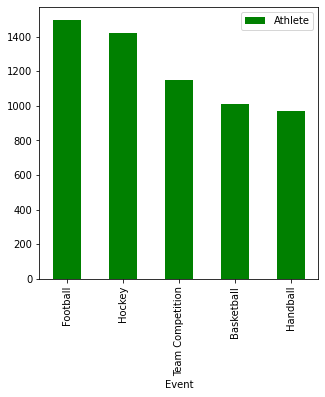

In [24]:
most_popular_events=most_popular_events.sort_values(by='Athlete',ascending=False).head().plot(x='Event',y='Athlete',kind='bar',color="green",figsize=(5,5))

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [25]:
Player_gold_female=df_gold[df_gold['Gender']=='Women']

In [26]:
Player_gold_female

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
641,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,Gold
649,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,Gold
710,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double Columbia Round (50Y - 40Y - 30Y),Gold
713,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double National Round (60Y - 50Y),Gold
...,...,...,...,...,...,...,...,...,...
31081,2012,London,Weightlifting,Weightlifting,"VALENTIN PEREZ, Lidia",ESP,Women,75KG,Gold
31097,2012,London,Wrestling,Wrestling Freestyle,"OBARA, Hitomi",JPN,Women,Wf 48 KG,Gold
31105,2012,London,Wrestling,Wrestling Freestyle,"YOSHIDA, Saori",JPN,Women,Wf 55 KG,Gold
31113,2012,London,Wrestling,Wrestling Freestyle,"ICHO, Kaori",JPN,Women,Wf 63 KG,Gold


In [27]:
Player_gold_female.groupby("Sport").count()["Gender"].sort_values(ascending = False).head()

Sport
Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Gender, dtype: int64

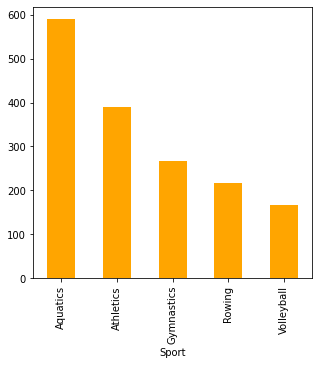

In [28]:
data2=Player_gold_female.groupby("Sport").count()["Gender"].sort_values(ascending = False).head().plot.bar(x="Athlete",y="Medal",color="orange",figsize=(5,5))